# <font color='dark'>**Detecção de texto em placas de carro**</h1>

# <font color='dark'>**Aula 2**</h1>

### Importação das bibliotecas

In [1]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

### Leitura da imagem

In [3]:
img_names = ['trecho_livro', 'placa_carro1', 'placa_carro2', 'placa_carro3']

In [4]:
img = cv2.imread(f'./data/{img_names[1]}.png')

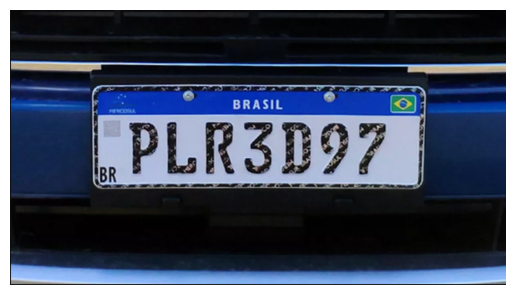

In [5]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

A biblioteca opencv importa as imagens com os canais BGR, como pode ser visto na [documentação](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html)

> **Note**

> *In the case of color images, the decoded images will have the channels stored in B G R order.*

O tesseract entende os canais na ordem RGB, portanto devemos fazer uma conversão da imagem de BGR para GRAY(escala de cinza), com o uso da função `cv2.cvtColor()`

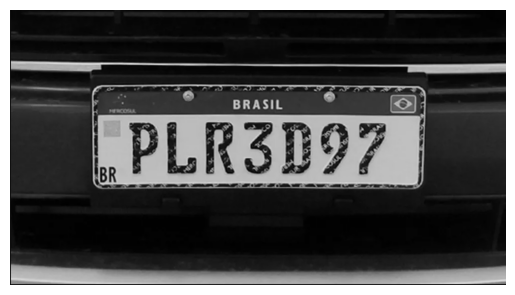

In [6]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [8]:
config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(img, lang='por', config=config_tesseract)
print(text)

Para conseguir realizar melhor a detecção dos textos contidos na imagem, podemos aplicar pré-processamentos na imagem a fim de deixar os caracteres mais destacados do restante da imagem.

Um desses pré-processamentos é a limiarização, que consiste em transformar a imagem totalmente para preto e branco.

- [Documentação OpenCV: Limiarização](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)

### Limiarização simples

![](https://i.imgur.com/9diya8F.gif)

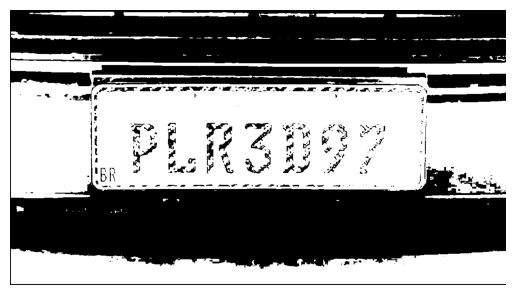

In [9]:
thresh = 25
value, lim_simples = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)

plt.imshow(cv2.cvtColor(lim_simples, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

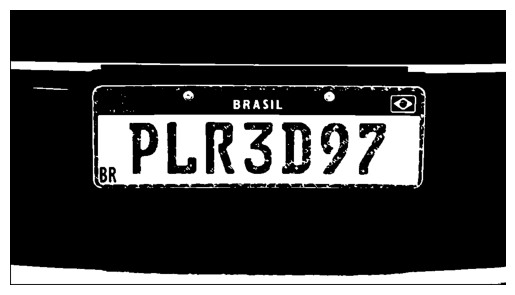

In [10]:
thresh = 127
value, lim_simples = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)

plt.imshow(cv2.cvtColor(lim_simples, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

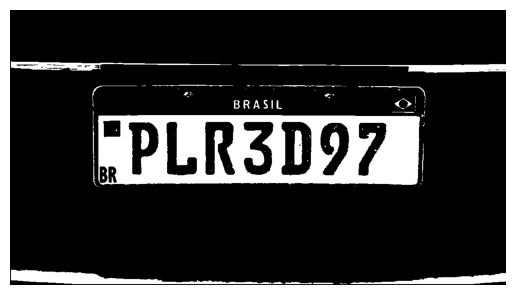

In [11]:
thresh = 170
value, lim_simples = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)

plt.imshow(cv2.cvtColor(lim_simples, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Limiarização adaptativa

![](https://i.imgur.com/j6w6Rwu.gif)

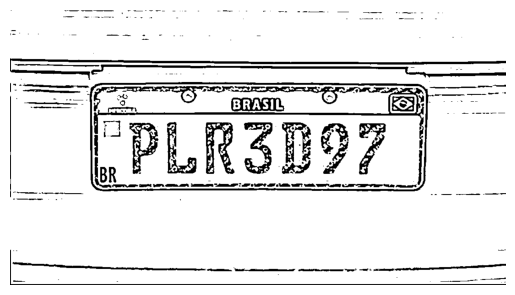

In [12]:
lim_adapt = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8)

plt.imshow(cv2.cvtColor(lim_adapt, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

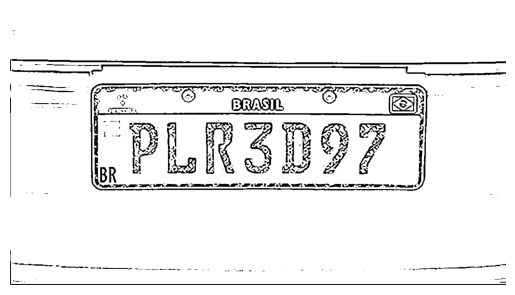

In [13]:
lim_adapt = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)

plt.imshow(cv2.cvtColor(lim_adapt, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Limiarização de Otsu

Podemos ver a intensidade de cor de uma imagem através de histogramas. A documentação do opencv sugere algumas formas de criar histogramas a partir de imagens:

- [Documentação OpenCV: Histogramas](https://docs.opencv.org/4.x/d1/db7/tutorial_py_histogram_begins.html)

In [14]:
img

array([[ 14,  14,   2, ...,   5,   5,   5],
       [ 14,  14,   2, ...,   5,   5,   5],
       [ 14,  14,   3, ...,   5,   5,   5],
       ...,
       [ 14,  14, 144, ..., 122, 121, 120],
       [ 14,  14,  14, ...,  14,  14,  14],
       [ 14,  14,  14, ...,  14,  14,  14]], dtype=uint8)

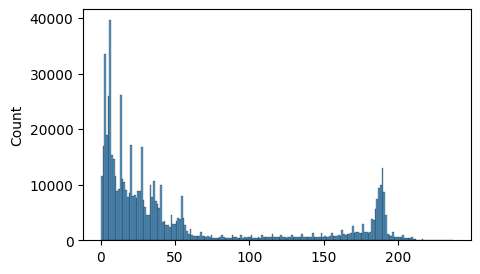

In [16]:
import seaborn as sns
ax = sns.histplot(img.flatten())
ax.figure.set_size_inches(5,3)

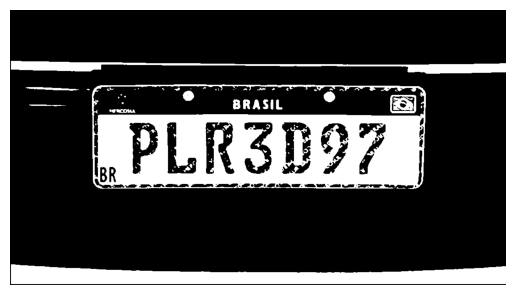

Limiar: 96.0


In [17]:
value, lim_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.imshow(cv2.cvtColor(lim_otsu, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

print(f'Limiar: {value}')

In [18]:
config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(lim_otsu, lang='por', config=config_tesseract)
print(text)